In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import randomized_svd as rsvd

In [ ]:
 A = np.random.normal(0, 1, size = (2000, 2000))

In [ ]:
start_time = time.time()
u, s, vh = np.linalg.svd(A)
s1 = np.zeros((2000, 2000))
s1[0][0] += s[0]
s1[1][1] += s[1]
A_svd = u @ s1 @ vh
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.067394971847534 seconds ---


In [ ]:
start_time = time.time()
u_2, s_2, vh_2 = svds(A, k=2)
A_svds = u_2 @ np.diag(s_2) @ vh_2
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5453071594238281 seconds ---


In [ ]:
start_time = time.time()
u_3, s_3, vh_3 = rsvd(A, n_components=2)
A_rsvd = u_3 @ np.diag(s_3) @ vh_3
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.19109892845153809 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


$A_{svd}$ и $A_{svds}$ приближают матрицу $A$ одинаково, т. к. представляют собой одну и ту же матрицу ввиду того, что матрица $A_{svd}$ представляет собой произведение трех матриц - $V \Sigma' U^T $ размера $2000 \times 2000$, где $U$ и $V$ - те же унитарные матрицы, что и в разложение $A$, а $\Sigma'$ имеет все нули, кроме двух первых диагональных элемента, на которых располагаются $2$ наибольших сингулярных значения матрицы $A$, а $A_{svds}$ представляет собой произведение трех матриц: $V' \Sigma'' U'^T$ размера $2000 \times 2, 2 \times 2, 2 \times 2000$, где $\Sigma''$ состоит из верхней левой подматрицы $2 \times 2$ матрицы $\Sigma'$, а $U'$ и $V'$ состоят из первых двух столбцов матрицы $U$ и $V$ соответственно. Легко проверить, что $V' \Sigma'' U'^T=V \Sigma' U^T $.
Однако время выполнения алгоритма второй программы более чем в $10$ раз быстрее первой, т. к. она вычисляет только $2$ собственных вектора матрицы $A^T A$ в отличии от первой программы, которая вычисляет все собственные вектора матрицы $A^T A$.

Самым быстрым, но менее точным, оказался алгоритм малорангового приближения матрицы $A$, связанный с рандомизированным методом SVD разложения матрицы $A$.

In [ ]:
u1, s1_1, vh1 = np.linalg.svd(A-A_svd)
A_F_1 = (sum(s1_1**2))**(1/2)
print(A_F_1)

1996.0398469353233


In [ ]:
u2, s2, vh2 = np.linalg.svd(A-A_svds)
A_F_2 = (sum(s2**2))**(1/2)
print(A_F_2)

1996.0398469353233


In [ ]:
u3, s3, vh3 = np.linalg.svd(A-A_rsvd)
A_F_3 = (sum(s3**2))**(1/2)
print(A_F_3)

1996.2799257651372


2. (i) $$(A^T A)^{-1} = (V \Sigma^T U^T U \Sigma V^T)^{-1} = (V(\Sigma^T \Sigma) V^T)^{-1} = V^{T -1} (\Sigma^T \Sigma)^{-1} V^{-1} = V(\Sigma^T \Sigma)^{-1})V^T.$$
Здесь было использовано, что в данном случае $V^* = V^T = V^{-1}$.

$V$ - унитарная матрица, $\Sigma^T \Sigma$ - диагональная матрица (в случае, если $A$ - невырожденный оператор, иначе $(A^T A)^{-1}$ не существует), значит и $(\Sigma^T \Sigma)^{-1}$ - диагональная матрица. Отсюда $V \Sigma' V^T$, где $\Sigma' = (\Sigma^T \Sigma)^{-1}$, - исходное SVD разложение матрицы $(A^T A)^{-1}.$

(ii) $$(A^T A)^{-1} A^T = V \Sigma' V^T V \Sigma^T U^T  = V (\Sigma' \Sigma^T) U^T.$$
$\Sigma^T$ - матрица с неотритаельными элементами на диагонали и остальными нулями, а $\Sigma'$ - диагональная матрица, значит $\Sigma' \Sigma^T$ - матрица с неотритаельными элементами на диагонали и остальными нулями, соответственно $V (\Sigma' \Sigma^T) U^T$ - искомое SVD разложение матрицы $(A^T A)^{-1} A^T$.

(iii) $$A (A^T A)^{-1} = U \Sigma V^T V \Sigma' V^T = U (\Sigma \Sigma') V^T.$$
Рассуждая так же, как в предыдущем пункте, проверяется, что $U (\Sigma \Sigma') V^T$ - SVD разложение матрицы $A (A^T A)^{-1}$.

(iv) $$A (A^T A)^{-1} A^T = U \Sigma V^T V \Sigma' V^T V \Sigma^T U^T = U (\Sigma \Sigma' \Sigma^T) U^T. $$
Аналогичное рассуждение показывает, что $U (\Sigma \Sigma' \Sigma^T) U^T$ - SVD разложение матрицы $A (A^T A)^{-1} A^T$.

3. 1) Для начала найдем единичные собственные векторы матрицы $A^*A$. Они образуют матрицу $$ U = \begin{pmatrix}
   4/5 & -3/5 \\
   3/5 & 4/5
 \end{pmatrix}.$$
 $$U^*A^*AU = Σ^2 = \begin{pmatrix}
   50 & 0 \\
   0 & 200
   \end{pmatrix}.$$
Обозначив $V = AU\Sigma^{-1}$, где из условия выше следует, что $V$ - унитарная матрица, получим следующее SVD разложение:
$A=V\Sigma U^*$, где
$$\Sigma = \sqrt(2) \begin{pmatrix}
  5 & 0 \\
  0 & 10
  \end{pmatrix}; $$
  $$V = AU\Sigma^{-1} = \frac{1}{\sqrt(2)} \begin{pmatrix}
  1 & 1 \\
  -1 & 1
  \end{pmatrix}; $$
  $$U^*= \begin{pmatrix}
   4/5 & 3/5 \\
   -3/5 & 4/5
  \end{pmatrix}$$

  В матрицах V и U по одному отрицательному элементу, и это минимальное число неотрицательных элементов для SVD разложения матрицы $A$, т. к. для квадратной матрицы с различными сингулярными числами разложение определено с точностью до знака, и если поменять знак, то в матрицах $U$ и $V$ будет по 3 отрицательных элемента.
  Таким образом, сингулярные числа матрицы $A$ равны $5\sqrt(2)$ и $10\sqrt(2)$; левые сингулрные векторы: $(\frac{1}{\sqrt(2)}, \frac{-1}{\sqrt(2)})$ и $(\frac{1}{\sqrt(2)}, \frac{1}{\sqrt(2)})$; правые сингулярные векторы: $(4/5, 3/5),$ $(-3/5, 4/5)$.

2)

In [ ]:
x = np.array([])
y = np.array([])
x1 = np.linspace(-1, 1, 250)
y1 = np.linspace(-1, 1, 250)
for i in x1:
  for j in y1:
    if i**2 + j**2 < 1 or i**2 + j**2 == 1:
      x = np.append(x, i)
      y = np.append(y, j)

In [ ]:
x2 = -2*x + 11*y
y2 = -10*x + 5*y

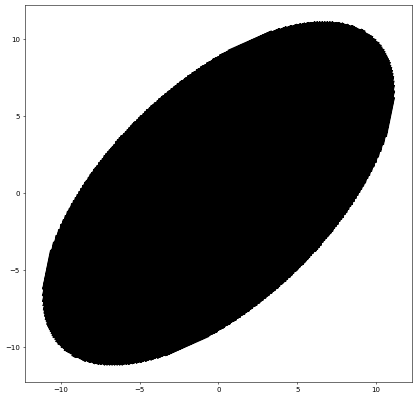

In [ ]:
figure(figsize=(10, 10), dpi=50)
plt.plot(x2,y2, color = 'k')

3) Спектральная норма матрицы $A$ равна ее максимальному сингулярному числу, то есть $||A||_2 = \sigma_1=10\sqrt(2)$. Фробениусова норма матрицы $A$ равна следующему: $||A||_F = (5\sqrt(2)^2+10\sqrt(2)^2)^{\frac{1}{2}} = 5\sqrt(10)$

4) $$A^{-1} = (V\Sigma U^*)^{-1} = U^{*-1}\Sigma^{-1}V^{-1} = U\Sigma^{-1}V^* = \begin{pmatrix}
1/20 & -11/100 \\
1/10 & -1/50
\end{pmatrix}$$

5) Собственные числа матрицы $A$ следующие:
$$\lambda_1 = \frac{3}{2} + i\frac{\sqrt(391)}{2}
\lambda_2 = \frac{3}{2} - i\frac{\sqrt(391)}{2}$$

# 4.

In [ ]:
A1 = np.load('A.npy')

In [ ]:
v4, s4, uh4 = np.linalg.svd(A1)
approx = s4[0]*v4[:, 0][np.newaxis].T @ uh4[0, :][np.newaxis]
sumdiff = (np.square(A1-approx)).sum()
summ = np.square(A1).sum()
#Относительная ошибка аппроксимации
delta = sumdiff**(1/2)/summ**(1/2)
print(delta)

0.7742251888975445


In [ ]:
deltas = []
for j in range(50):
  approx_sum = np.zeros((50, 50))
  for i in range(j+1):
    approx = s4[i]*v4[:, i][np.newaxis].T @ uh4[i, :][np.newaxis]
    approx_sum += approx
  sumdiff = (np.square(A1-approx_sum)).sum()
  summ = np.square(A1).sum()
  delta = sumdiff**(1/2)/summ**(1/2)
  deltas.append(delta)
#Список относительных ошибок для K = 1, 2, ...
print(deltas)

[0.7742251888975445, 0.4468740915902548, 0.30994040577703325, 3.2486246302912386e-15, 3.245538404601271e-15, 3.2444506249482976e-15, 3.2440905947395e-15, 3.244040063691471e-15, 3.2442133002571124e-15, 3.244560952291579e-15, 3.244279184060857e-15, 3.244653183462878e-15, 3.245724818358482e-15, 3.245876309167194e-15, 3.2464036617107614e-15, 3.2461879015011273e-15, 3.246646738576428e-15, 3.2477372147907833e-15, 3.2487931421428885e-15, 3.248557378675681e-15, 3.2483681551733336e-15, 3.2485811222887425e-15, 3.248775572829357e-15, 3.2496427121191474e-15, 3.250076973921332e-15, 3.2493724525308907e-15, 3.2497764024535806e-15, 3.2502736730245743e-15, 3.2504052247533946e-15, 3.251155380542492e-15, 3.251571992553061e-15, 3.2520411431657577e-15, 3.2522717651695487e-15, 3.2528641801111665e-15, 3.2536017872468513e-15, 3.253537825631785e-15, 3.253618934085834e-15, 3.254585038325099e-15, 3.2553802358553008e-15, 3.2551267758931443e-15, 3.255735143850378e-15, 3.257050164575609e-15, 3.256769146291489e-15, 

Чтобы приближение стало точным, необходимо, чтобы число членов суммы равнялось рангу аппроксимируемой матрицы.

# 5.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
A = digits.data
y = digits.target

In [ ]:
#список пискселей
b = np.zeros(32*32)
for i in range(len(A[0])):
  r = np.random.choice(16, int(A[10][i]), replace = False) #Поменять в A[k][i] k, чтобы получить модель k-го сэмпла
  b[r+16*i] += 1

In [ ]:
B = np.zeros((32, 32))
for i in range(8):
  for j in range(8):
    for k in range(4):
      for m in range(4):
        B[i*4+k][j*4+m] += b[i*128+ j*16 + k*4+m]
# В итоге разместили пиксили по матрице изображения в соответствии с
# исходным вектором количества пикселей в блоках 4*4 (где в блоках разместили k пикселей случайным образом)

In [ ]:
x1 = np.array([])
y1 = np.array([])
for i in range(32):
  for j in range(32):
    if B[i][j] == 1:
      x1 = np.append(x1, i)
      y1 = np.append(y1, j)

0


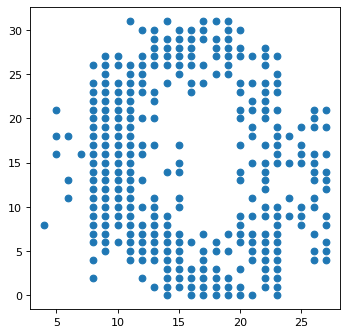

In [ ]:
# Рисунок второго сэмпла нуля
figure(figsize=(5, 5), dpi=80)
plt.scatter(y1, x1)
print(y[10])

3


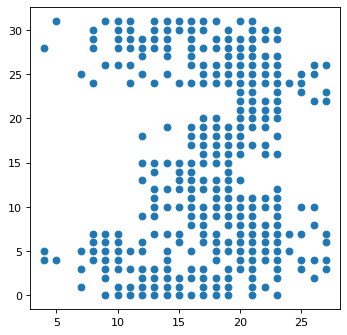

In [ ]:
# Рисунок второго сэмпла тройки
figure(figsize=(5, 5), dpi=80)
plt.scatter(y1, x1)
print(y[3])

7


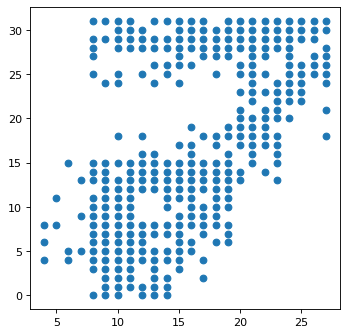

In [ ]:
# Рисунок четвертого сэмпла семерки
figure(figsize=(5, 5), dpi=80)
plt.scatter(y1, x1)
print(y[17])

In [ ]:
# Проекция N*64 датасета на N*2 датасет
A2 = A / 16
v_5, s_5, uh_5 = svds(A2, k=2)
A_red = (v_5 @ np.diag(s_5) @ uh_5)[:, 62:64]

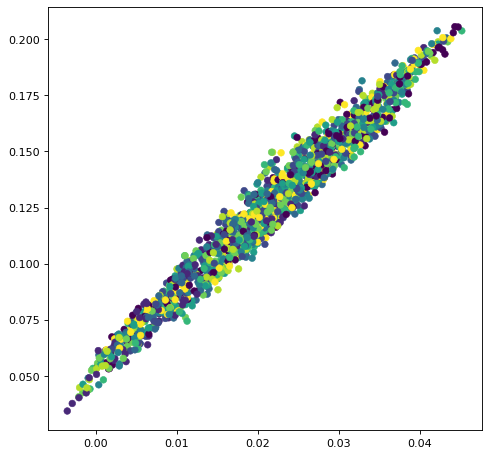

In [ ]:
#scatter_plot сжатых данных
color_list = np.array([plt.cm.cool(i/(10-1)) for i in range(10)])[:, 0]
colors = np.array([])
for i in range(1797):
  r = i % 10
  colors = np.append(colors, color_list[r])
figure(figsize=(7, 7), dpi=80)
x2 = A_red[:, 0]
y2 = A_red[:, 1]
plt.scatter(y2, x2, c = colors, linewidths=0.5)